<a href="https://colab.research.google.com/github/abdelrhmanhesham1/projects/blob/main/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing


In [2]:
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

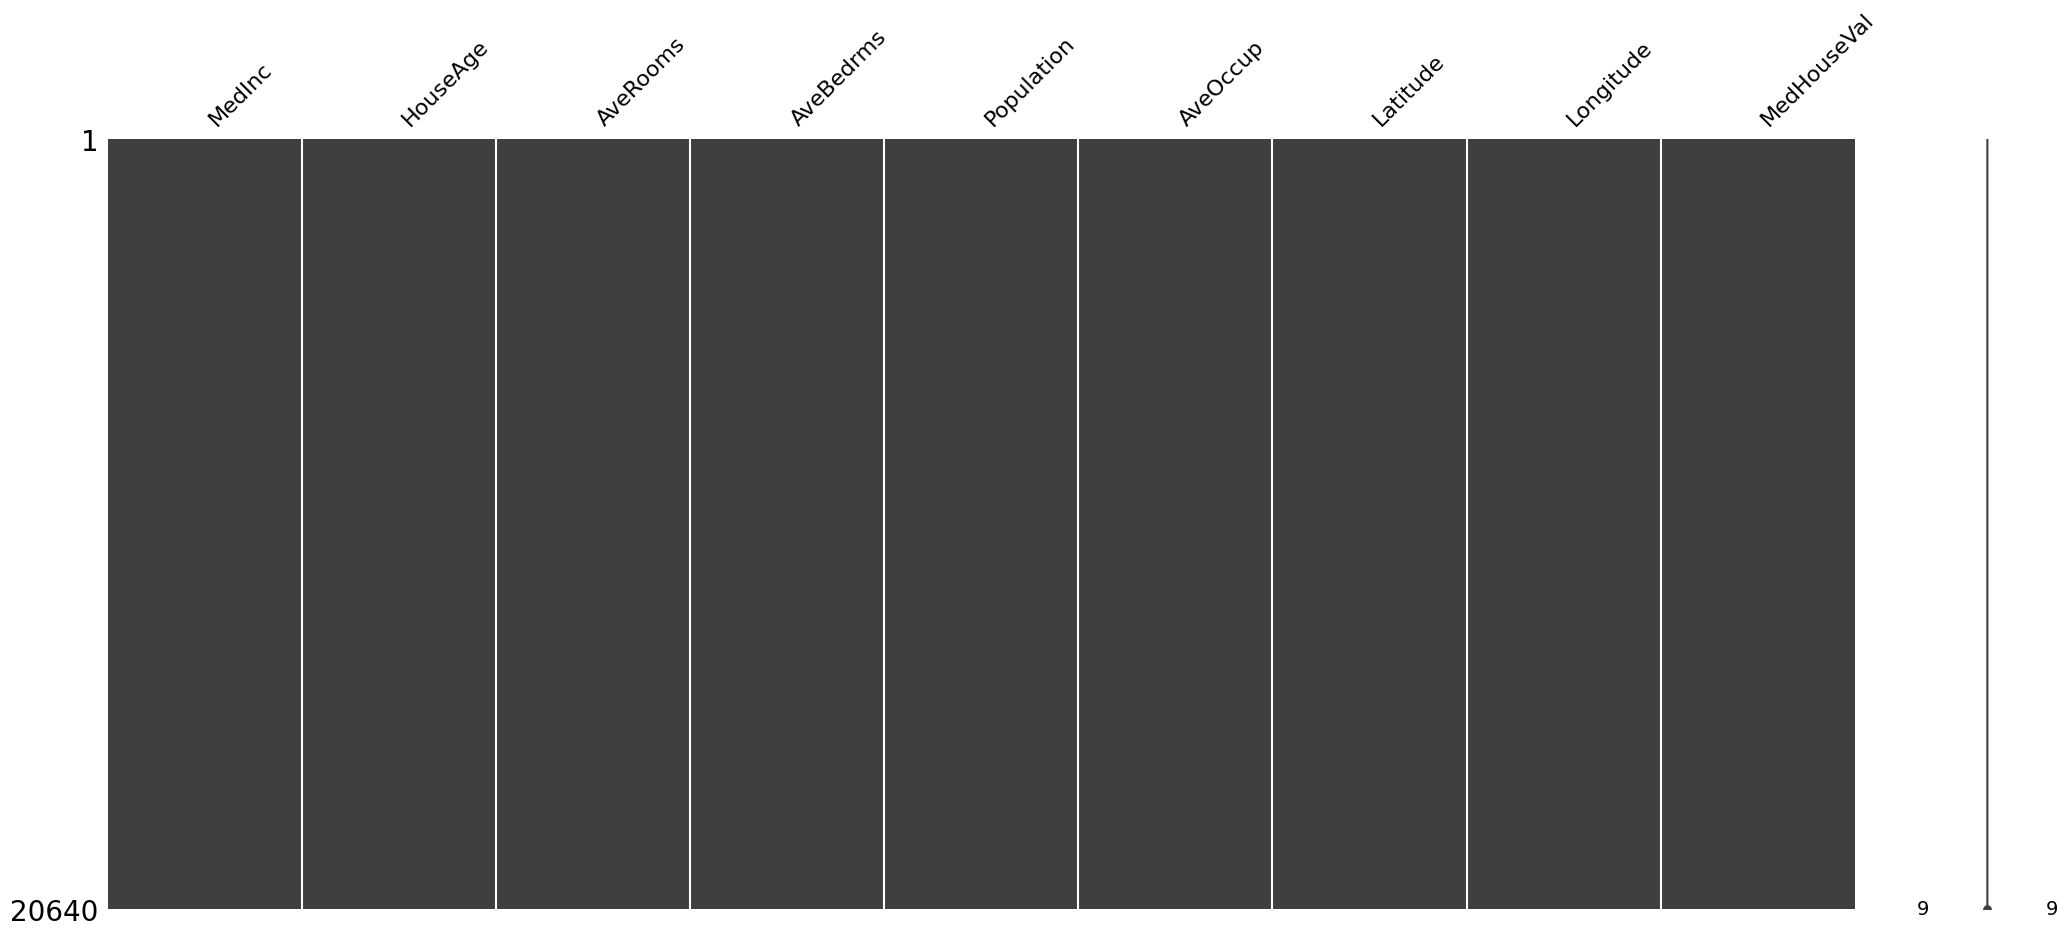

In [5]:
import missingno
missingno.matrix(df)

In [6]:
df.duplicated().sum()
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
num_col =list(df.select_dtypes(include=['int64', 'float64']).columns)
num_col

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

In [8]:
#calculate quantiles
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr = q3 -q1
upper_fence = q3+1.5*iqr
lower_fence = q1-1.5*iqr

In [9]:
q1

,0.25
MedInc,2.563400
HouseAge,18.000000
AveRooms,4.440716
AveBedrms,1.006079
Population,787.000000
AveOccup,2.429741
Latitude,33.930000
Longitude,-121.800000
MedHouseVal,1.196000


In [10]:

def include_outliers(df=df, num_cols=num_col, lower_fence=lower_fence, upper_fence=upper_fence):
  exist_outliers = dict()
  for col in num_col:
    if ((df[col]>upper_fence[col]).any()) or ((df[col]<lower_fence[col]).any()):
      exist_outliers[col]=True

  return exist_outliers

In [11]:
outliers_dict = include_outliers()
outliers_dict

{'MedInc': True,
 'AveRooms': True,
 'AveBedrms': True,
 'Population': True,
 'AveOccup': True,
 'MedHouseVal': True}

In [12]:
df[outliers_dict.keys()].skew()


,0
MedInc,1.646657
AveRooms,20.697869
AveBedrms,31.316956
Population,4.935858
AveOccup,97.639561
MedHouseVal,0.977763


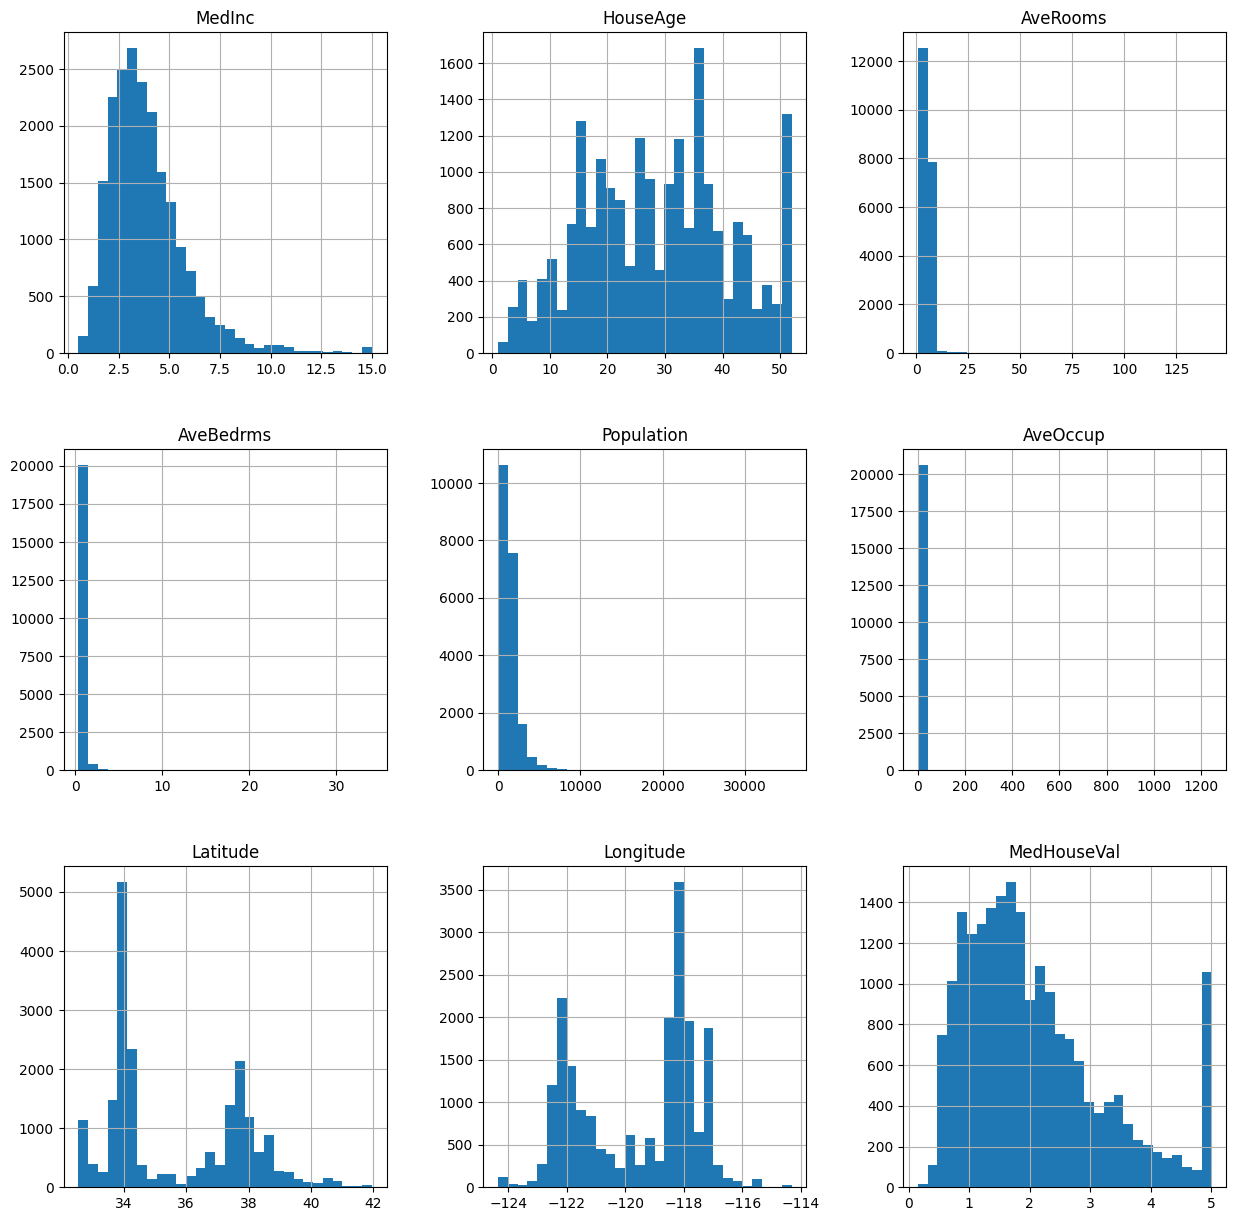

In [13]:
df.hist(bins=30, figsize=(15,15))
plt.show()

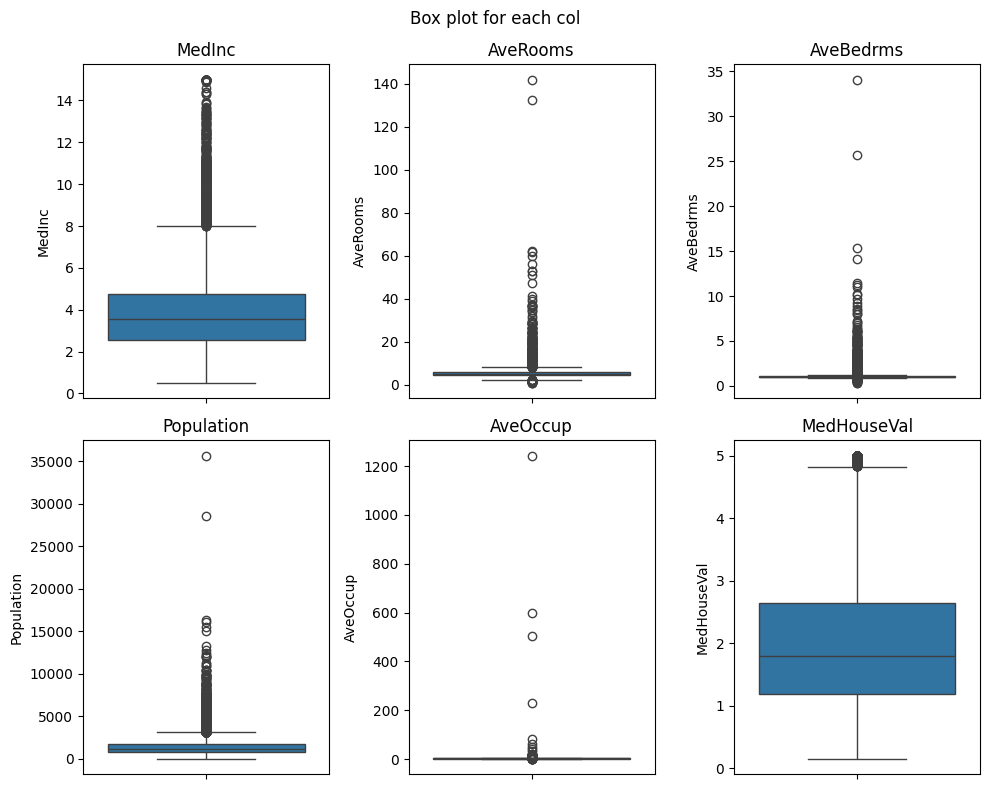

In [14]:
plt.figure(figsize=(10,8))
for i, col in enumerate (outliers_dict.keys()):
  plt.subplot(2, 3, i+1)
  sns.boxplot(df, y=col)
  plt.title(col)

plt.suptitle('Box plot for each col')
plt.tight_layout()
plt.show()


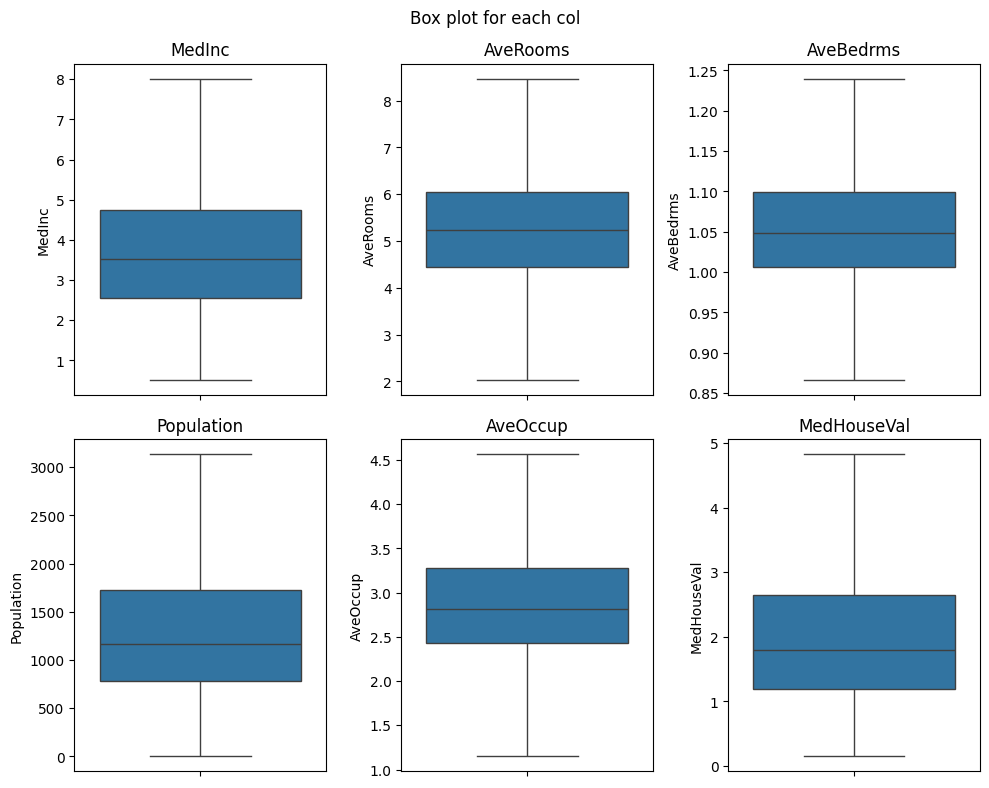

In [15]:
# preprocessing:
# 1- outiers:
for col in df[outliers_dict.keys()]:
    df[col]=np.where(df [col]>upper_fence[col],upper_fence [col],df [col])
    df [col]=np.where(df[col]<lower_fence[col],lower_fence [col],df [col])

plt.figure(figsize=(10,8))
for i,col in enumerate(df[outliers_dict.keys()]):
    plt.subplot(2,3,i+1)
    sns.boxplot (df,y=col)
    plt.title(col)

plt.suptitle('Box plot for each col')
plt.tight_layout()
plt.show()

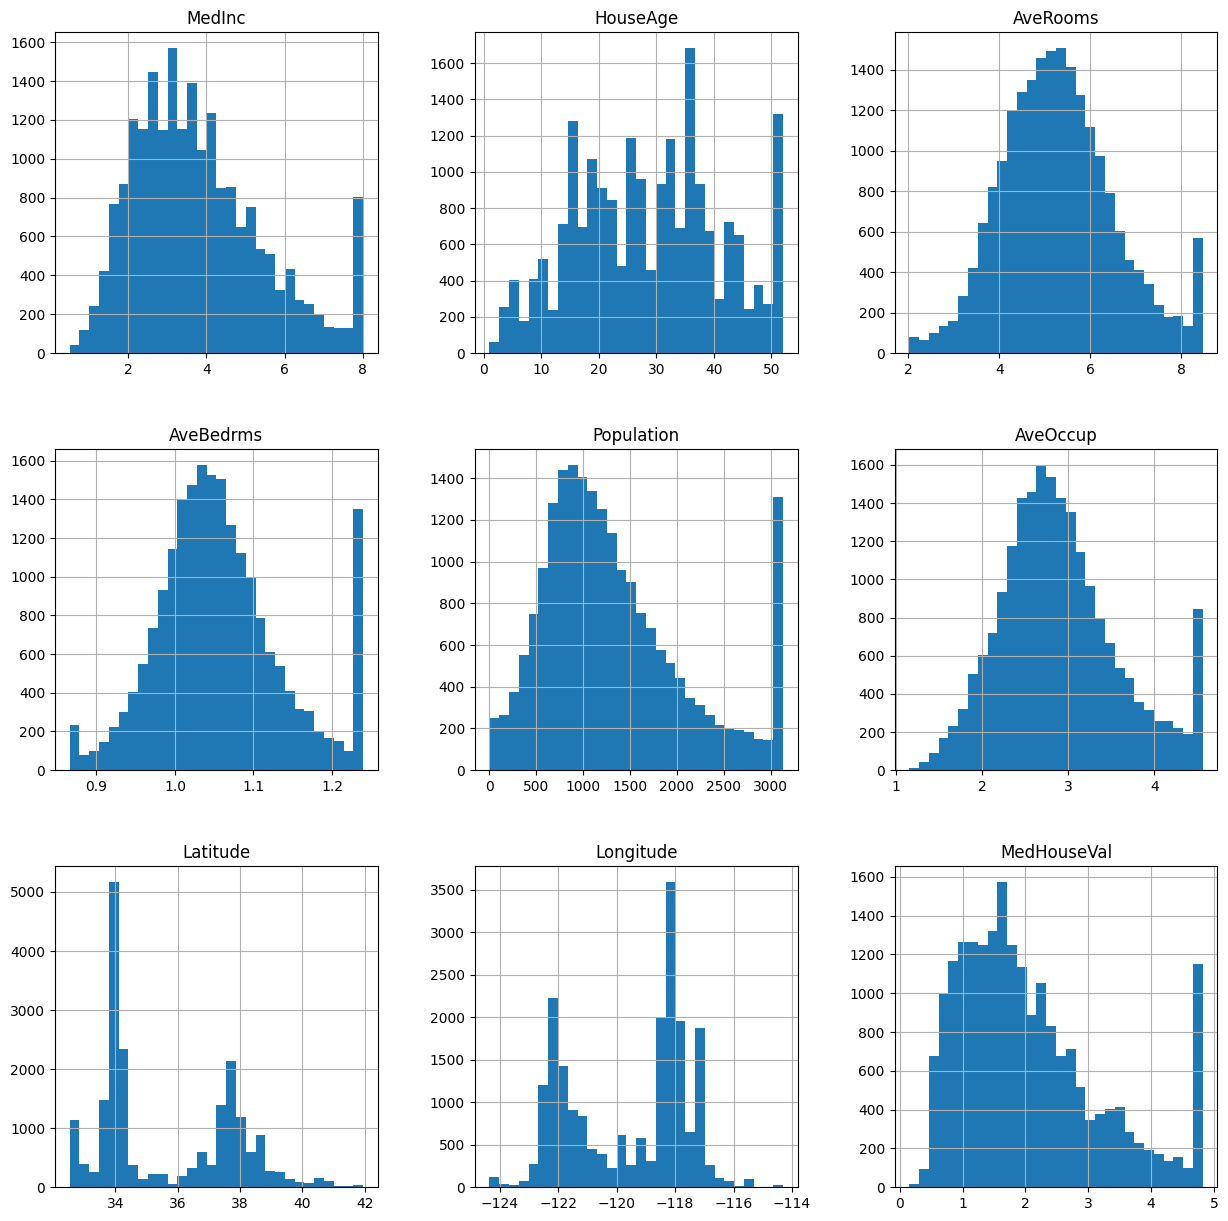

In [16]:
df.hist(bins=30, figsize=(15, 15))
plt.show()

In [17]:
df.skew()

,0
MedInc,0.735618
HouseAge,0.060331
AveRooms,0.348567
AveBedrms,0.462645
Population,0.842247
AveOccup,0.510453
Latitude,0.465953
Longitude,-0.297801
MedHouseVal,0.912330


In [18]:
print(f"total number of insurances: {df.shape[0]}")
print(f"total number of attributes: {df.shape[1]}")


total number of insurances: 20640
total number of attributes: 9


In [19]:
#info about the dataset
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [20]:
corr=df.corr()
corr['MedHouseVal'].sort_values(ascending=False)


,MedHouseVal
MedHouseVal,1.000000
MedInc,0.689654
AveRooms,0.309365
HouseAge,0.104423
Population,-0.030735
Longitude,-0.046311
AveBedrms,-0.098315
Latitude,-0.145494
AveOccup,-0.281963


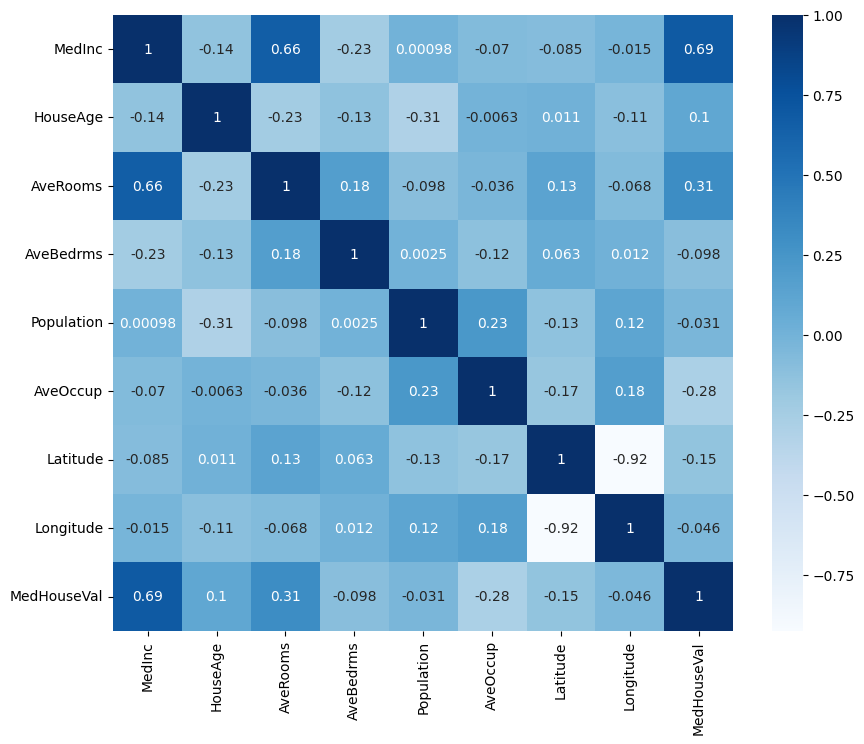

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

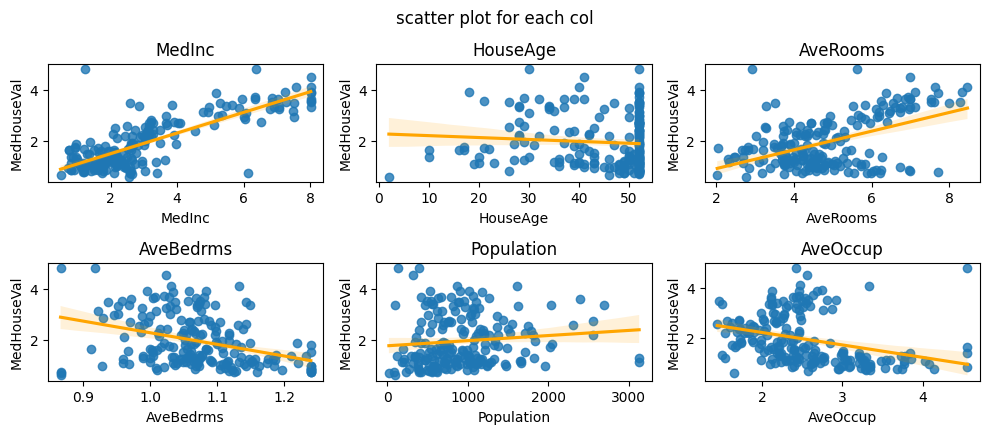

In [22]:
#show scattered plot of data
columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
plt.figure(figsize=(10,8))
for i, col in enumerate(columns):
  plt.subplot(4, 3, i+1)
  sns.regplot(x=df.loc[:200, col], y=df.loc[:200, 'MedHouseVal'], line_kws= {'color':'orange'})
  plt.title(col)

plt.suptitle('scatter plot for each col')
plt.tight_layout()
plt.show()


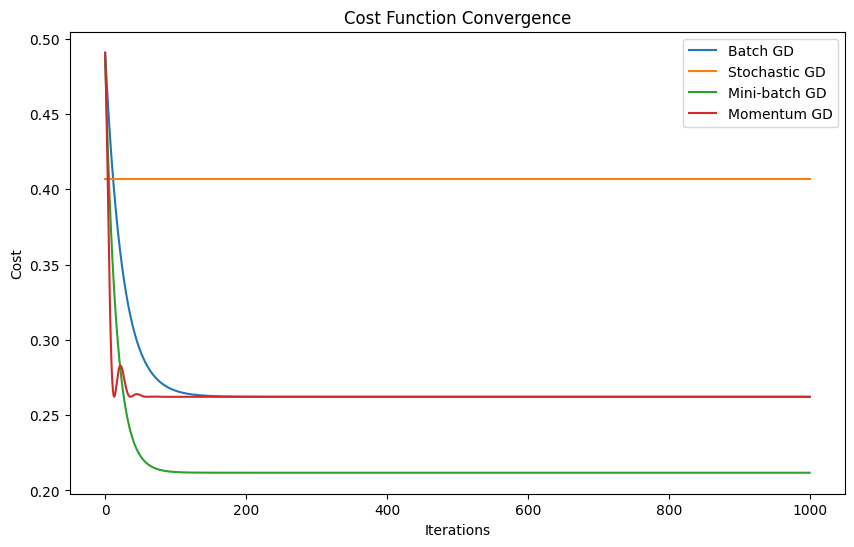

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df['MedInc'].values.reshape(-1, 1)).flatten()
y_scaled = scaler.fit_transform(df['MedHouseVal'].values.reshape(-1, 1)).flatten()

def compute_cost(X, y, theta_0, theta_1):
    m = len(y)
    return np.sum((theta_0 + theta_1 * X - y) ** 2) / (2 * m)

def update_theta(X, y, theta_0, theta_1, alpha, batch=None, momentum=False, beta=0):
    error = (theta_0 + theta_1 * X) - y
    grad_0, grad_1 = np.sum(error) / len(y), np.sum(error * X) / len(y)

    if momentum:
        return beta * grad_0 + alpha * grad_0, beta * grad_1 + alpha * grad_1
    return alpha * grad_0, alpha * grad_1

def gradient_descent(X, y, alpha, num_iters, method="batch", batch_size=None, beta=0.9):
    theta_0, theta_1, costs, v0, v1 = 0, 0, [], 0, 0

    for _ in range(num_iters):
        if method == "stochastic":
            for i in range(len(y)):
                err = (theta_0 + theta_1 * X[i]) - y[i]
                theta_0 -= alpha * err
                theta_1 -= alpha * err * X[i]
        else:
            if method == "mini-batch":
                indices = np.random.choice(len(y), batch_size, replace=False)
                X, y = X[indices], y[indices]

            update_0, update_1 = update_theta(X, y, theta_0, theta_1, alpha, method == "mini-batch", beta)

            if method == "momentum":
                v0, v1 = beta * v0 + update_0, beta * v1 + update_1
                theta_0, theta_1 = theta_0 - v0, theta_1 - v1
            else:
                theta_0, theta_1 = theta_0 - update_0, theta_1 - update_1

        costs.append(compute_cost(X, y, theta_0, theta_1))

    return theta_0, theta_1, costs

num_iters, alpha, batch_size, beta = 1000, 0.02, 9, 0.9
methods = ["batch", "stochastic", "mini-batch", "momentum"]
results = {m: gradient_descent(X_scaled, y_scaled, alpha, num_iters, m, batch_size, beta) for m in methods}

# Plot cost function convergence
plt.figure(figsize=(10, 6))
for name, (_, _, costs) in results.items():
    plt.plot(costs, label=name.capitalize() + " GD")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()


In [45]:
import plotly.express as px

df['MedHouseVal_scaled']=df['MedHouseVal'] *100000

#create the map
fig= px.scatter_mapbox(
    df,
    lat='Latitude',
    lon='Longitude',
    size='MedHouseVal_scaled',
    color='HouseAge',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='House Prices in California (Median House Value)',
    mapbox_style="open-street-map",
    zoom=5,
    center={"lat":36.7783, "lon":-119.4179},
    height=600
)

fig.show()